In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import sklearn as sk
import seaborn as sns

In [2]:
df = pd.read_csv('AmesHousing.csv',  sep='\t')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
df.isnull()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,False,False,True,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [7]:
missing = df.isnull().sum()[df.isnull().sum() > 0]
missing.sort_values(ascending=False)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64

<Axes: >

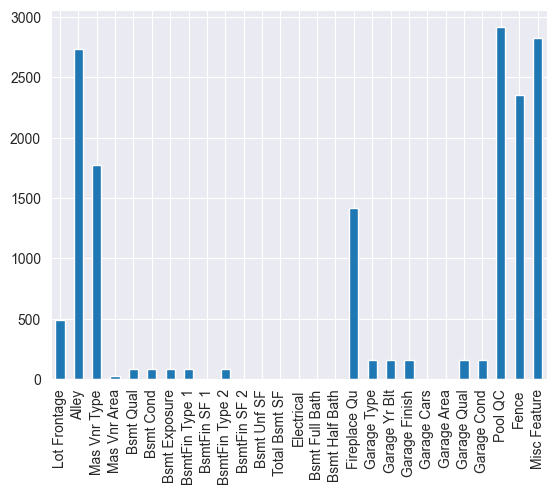

In [8]:
missing.plot(kind='bar')

Alley, PoolQC, Fence, MiscFeature have a lot of missing values. We will drop these columns.

In [9]:
df = df.drop(columns=['Alley', 'Pool QC', 'Fence', 'Misc Feature'])

In [10]:
df.info

<bound method DataFrame.info of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Lo

We noticed we could combine Fireplace and FireplaceQu into a single column, a boolean colmumn indicating whether a house has a fireplace or not.

In [11]:
df['Has Fireplace'] = df['Fireplaces'] > 0

In [12]:
df[['Has Fireplace','Fireplaces']].head(20)

,Has Fireplace,Fireplaces
0,True,2
1,False,0
2,False,0
3,True,2
4,True,1
5,True,1
6,False,0
7,False,0
8,True,1
9,True,1


In [13]:
df = df.drop(columns=['Fireplaces', 'Fireplace Qu'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

Checking the names of all the columns.

Checking the correlation of Land Slope and Land Contour with SalePrice.

In [15]:
df[['Land Slope', 'Land Contour', 'SalePrice']].head()

,Land Slope,Land Contour,SalePrice
0,Gtl,Lvl,215000
1,Gtl,Lvl,105000
2,Gtl,Lvl,172000
3,Gtl,Lvl,244000
4,Gtl,Lvl,189900


Checking how many entries of the pair Land Slope = Gtl and Land Contour = HLS.

In [16]:
df[(df['Land Slope'] == 'Gtl') & (df['Land Contour'] == 'HLS')]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Has Fireplace
7,8,527145080,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,...,0,144,0,0,1,2010,WD,Normal,191500,False
280,281,908203100,20,RL,64.0,6410,Pave,Reg,HLS,AllPub,...,0,0,0,0,5,2010,WD,Normal,90000,False
303,304,910205120,50,RM,50.0,9140,Pave,Reg,HLS,AllPub,...,0,200,0,0,4,2010,COD,Normal,110000,False
321,322,921128020,20,RL,89.0,13214,Pave,IR1,HLS,AllPub,...,0,0,0,0,5,2010,WD,Normal,378500,True
347,348,527108070,20,RL,42.0,14892,Pave,IR1,HLS,AllPub,...,0,0,0,0,10,2009,WD,Normal,377500,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2618,535425080,60,RL,NaN,18275,Pave,IR1,HLS,AllPub,...,0,0,0,0,9,2006,WD,Normal,277500,True
2730,2731,905351045,150,RL,NaN,1700,Pave,Reg,HLS,AllPub,...,0,200,0,0,4,2006,WD,Normal,148400,False
2821,2822,908127050,20,RL,73.0,16133,Pave,Reg,HLS,AllPub,...,0,112,0,0,12,2006,WD,Abnorml,119900,False
2851,2852,909250200,70,RL,69.0,4899,Pave,Reg,HLS,AllPub,...,0,0,0,0,6,2006,WD,Normal,149000,False


We will eliminate the entries with Land Slope = Gtl and Land Contour = HLS because they are obviously errors.

In [17]:
df = df[~((df['Land Slope'] == 'Gtl') & (df['Land Contour'] == 'HLS'))]

Feature Engineering: Adding total square footage of house and price per square foot as useful columns.

In [18]:
df['Total SF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']

In [19]:
df['Price per SF'] = df['SalePrice'] / df['Total SF']

Checking the correlation of the new columns with SalePrice.

In [20]:
df[['Total SF', 'Price per SF', 'SalePrice']].corr()

,Total SF,Price per SF,SalePrice
Total SF,1.000000,0.108053,0.789982
Price per SF,0.108053,1.000000,0.634888
SalePrice,0.789982,0.634888,1.000000


<Axes: >

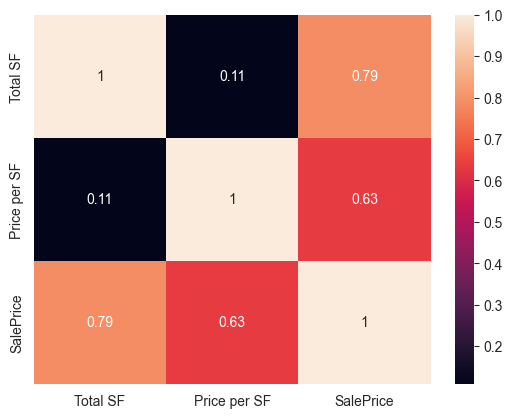

In [21]:
import seaborn as sns
sns.heatmap(df[['Total SF', 'Price per SF', 'SalePrice']].corr(), annot=True)


The strongest correlation is between Total SF and SalePrice. It is valuable for prediction.

Checking for other useless features.

In [22]:
missing_threshold = len(df) * 0.5
high_missing = df.isnull().sum()[df.isnull().sum() > missing_threshold]

In [23]:
high_missing

Mas Vnr Type    1731
dtype: int64

We will drop these columns with more than 50% missing values.

In [24]:
df = df.drop(columns=high_missing.index)

Checking if column was actually dropped.

In [25]:
'Mas Vnr Type' in df.columns

False

Checking distribution of SalePrice.


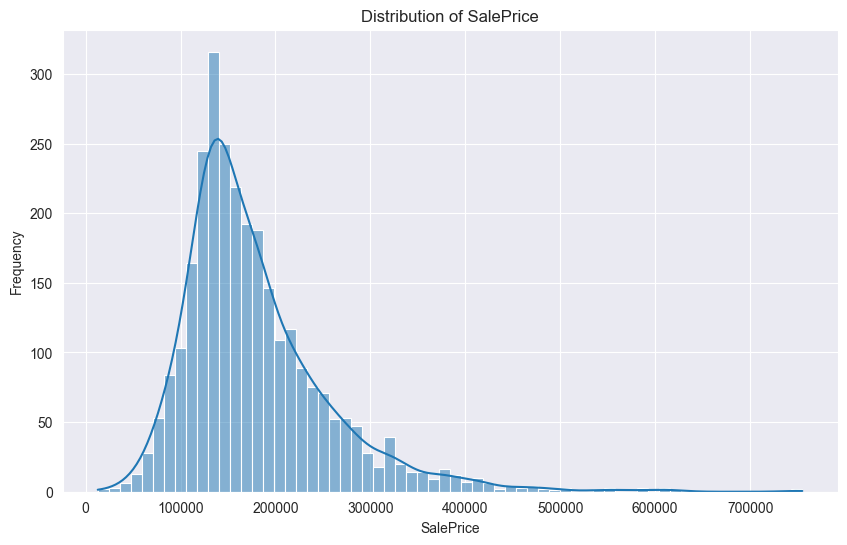

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


In [27]:
df['SalePrice'].skew()

np.float64(1.7936903287672765)

In [28]:
df['SalePrice'].describe()

count      2851.000000
mean     178854.026307
std       77969.464595
min       12789.000000
25%      129000.000000
50%      160000.000000
75%      211750.000000
max      755000.000000
Name: SalePrice, dtype: float64

# SalePrice is right-skewed. We will apply a log transformation to normalize it.

In [29]:
import numpy as np

In [30]:
df['Log SalePrice'] = np.log(df['SalePrice'])

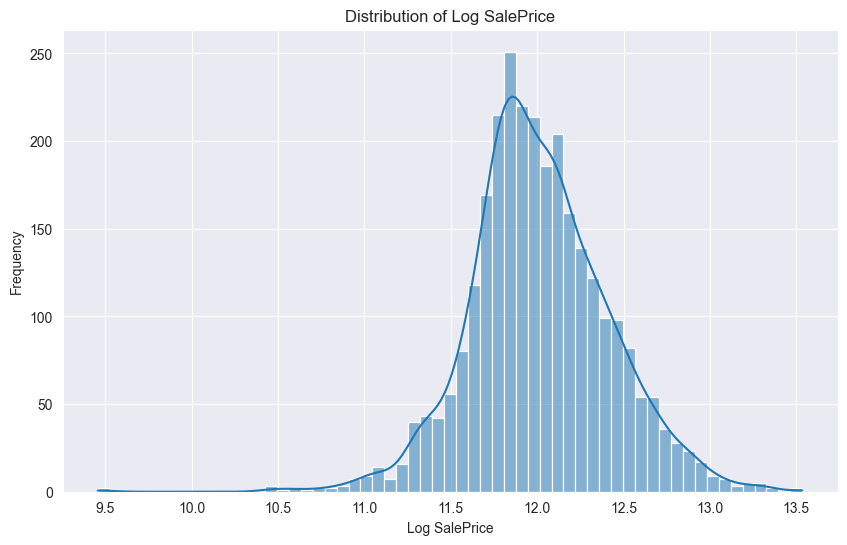

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['Log SalePrice'], kde=True)
plt.title('Distribution of Log SalePrice')
plt.xlabel('Log SalePrice')
plt.ylabel('Frequency')
plt.show()


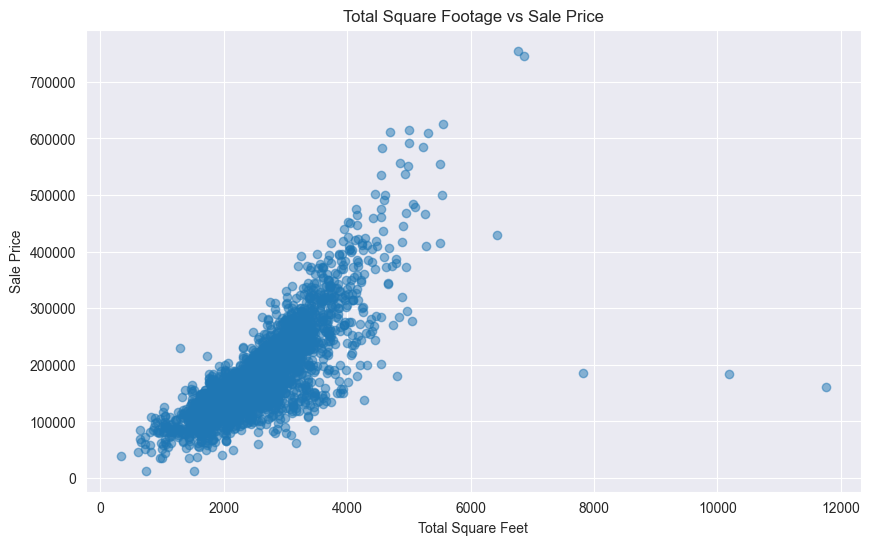

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Total SF'], df['SalePrice'], alpha=0.5)
plt.xlabel('Total Square Feet')
plt.ylabel('Sale Price')
plt.title('Total Square Footage vs Sale Price')
plt.show()

# There is a positive correlation between Total SF and SalePrice. We checked using a scatter plot.

<Figure size 1200x600 with 0 Axes>

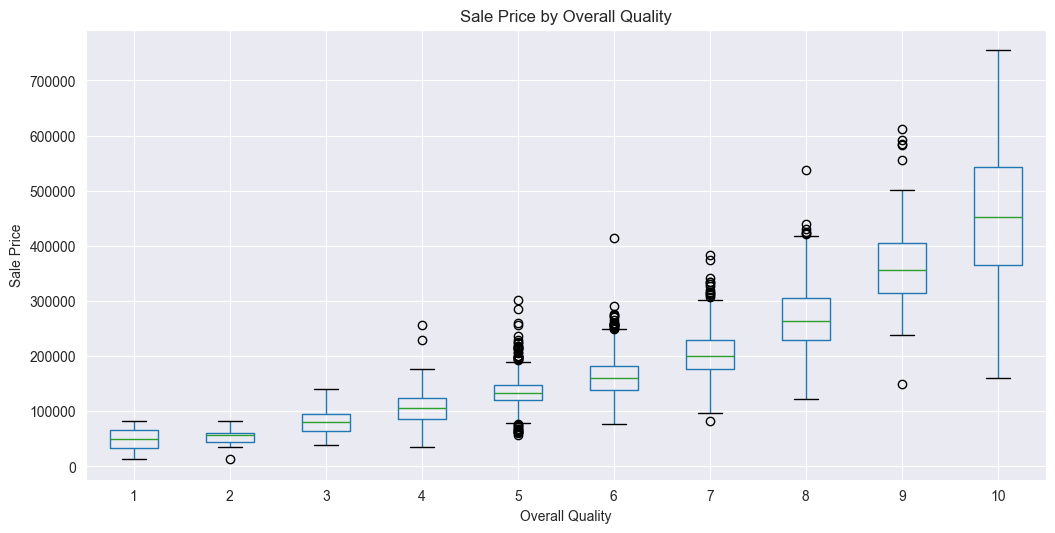

In [33]:
plt.figure(figsize=(12, 6))
df.boxplot(column='SalePrice', by='Overall Qual', figsize=(12, 6))
plt.suptitle('')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Sale Price by Overall Quality')
plt.show()

In [34]:
# There is a strong positive correlation between Overall Quality and SalePrice. We checked using a box plot.

# Lets check for outliers in SalesPrice.

In [35]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['SalePrice'] < Q1 - 1.5 * IQR) | (df['SalePrice'] > Q3 + 1.5 * IQR)]
print(f"Number of price outliers: {len(outliers)}")
outliers[['SalePrice', 'Total SF', 'Overall Qual']].head()

Number of price outliers: 126


,SalePrice,Total SF,Overall Qual
15,538000,4929.0,8
17,394432,3712.0,9
36,376162,3924.0,9
38,395192,3870.0,9
44,611657,4694.0,9


In [36]:
# Lets add a linear regression line to the scatter plot of Total SF vs SalePrice.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
X = df[['Total SF']].dropna()
y = df.loc[X.index, 'SalePrice']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


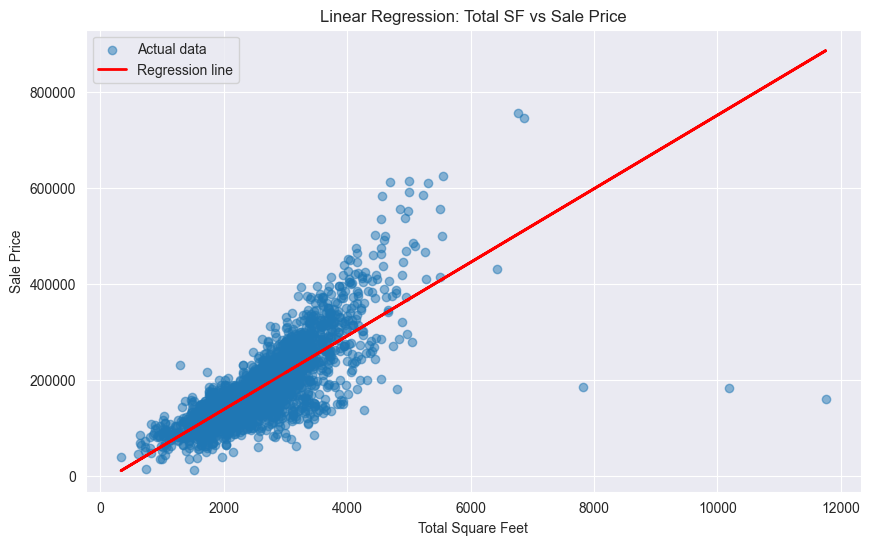

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Actual data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('Total Square Feet')
plt.ylabel('Sale Price')
plt.title('Linear Regression: Total SF vs Sale Price')
plt.legend()
plt.show()

In [42]:
test_index = X_test.index[0]
test_value = X_test.iloc[0, 0] # Total SF of the first test sample

actual = y_test.iloc[0]
predicted = model.predict([[test_value]])[0]

C:\Users\vasiu\UBB\Info\ML\Lab1\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
print(f"Actual price: ${actual:,.0f}")
print(f"Predicted price: ${predicted:,.0f}")
print(f"Difference: ${abs(actual - predicted):,.0f}")
print(f"Accuracy: {(1 - abs(actual - predicted)/actual) * 100:.1f}%")

Actual price: $167,000
Predicted price: $180,651
Difference: $13,651
Accuracy: 91.8%


In [44]:
# The prediction is reasonably accurate for a simple linear regression model.

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Mean Squared Error: ${mse:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared: {r2:.4f}")


Mean Absolute Error: $31,431.66
Mean Squared Error: $1,995,726,499.84
Root Mean Squared Error: $44,673.55
R-squared: 0.6443


In [46]:
# The evaluation metrics indicate that the model has some predictive power, but there is room for improvement.

Checking for linearly correlated features to remove multicollinearity.

In [47]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

correlations = df[numerical_cols].corr()['SalePrice'].sort_values(ascending=False)

print(correlations.head(15))

SalePrice         1.000000
Log SalePrice     0.945063
Overall Qual      0.792827
Total SF          0.789982
Gr Liv Area       0.706001
Garage Cars       0.643695
Garage Area       0.640139
Price per SF      0.634888
Total Bsmt SF     0.627823
1st Flr SF        0.614982
Year Built        0.551657
Full Bath         0.539046
Year Remod/Add    0.526485
Garage Yr Blt     0.525053
Mas Vnr Area      0.500835
Name: SalePrice, dtype: float64


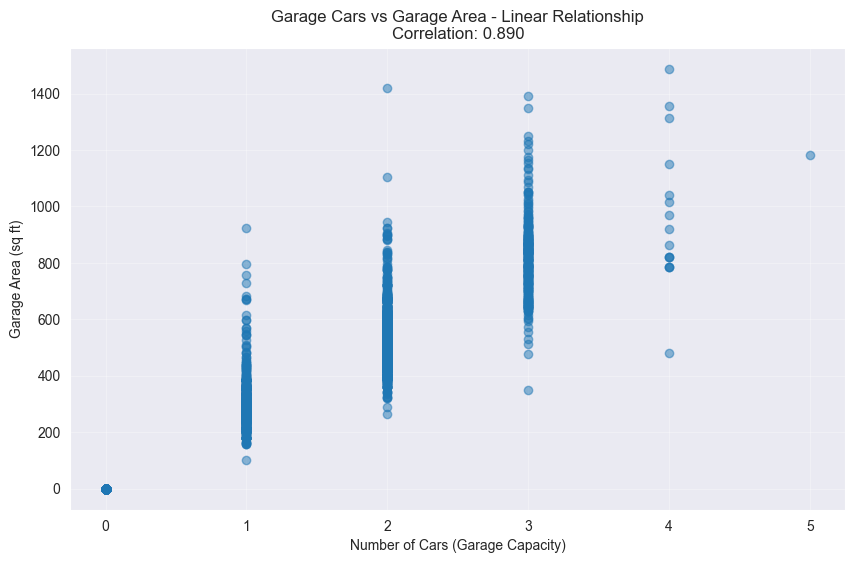

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Garage Cars'], df['Garage Area'], alpha=0.5)
plt.xlabel('Number of Cars (Garage Capacity)')
plt.ylabel('Garage Area (sq ft)')
plt.title(f'Garage Cars vs Garage Area - Linear Relationship\nCorrelation: {df["Garage Cars"].corr(df["Garage Area"]):.3f}')
plt.grid(True, alpha=0.3)
plt.show()

In [49]:
# Garage Cars and Garage Area are highly correlated. This proves liniarity

#LAB2

In [80]:
#Creating price categories on quantiles to make the distribution more balanced

In [81]:
df['PriceCategory'] = pd.qcut(df['SalePrice'], 
                                q=4, 
                                labels=['Low', 'Medium', 'High', 'Very High'])

In [82]:
print("Category counts:")
print(df['PriceCategory'].value_counts().sort_index())

Category counts:
PriceCategory
Low          717
Medium       729
High         692
Very High    713
Name: count, dtype: int64


In [83]:
df[['SalePrice', 'Price Category']].head(10)

,SalePrice,Price Category
0,215000,High
1,105000,Medium
2,172000,Medium
3,244000,High
4,189900,Medium
5,195500,Medium
6,213500,High
8,236500,High
9,189000,Medium
10,175900,Medium


In [84]:
# Visualizing price categories

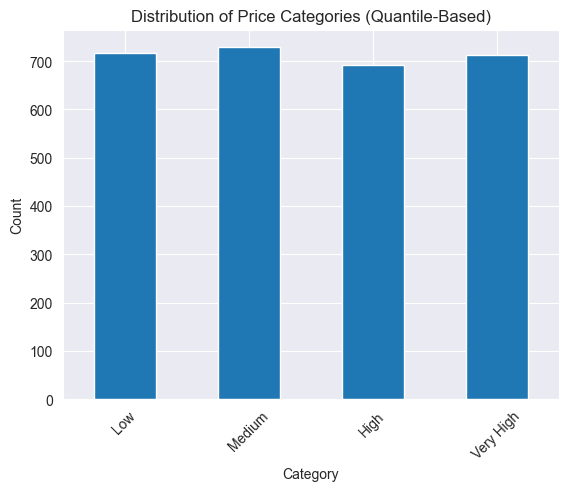

In [85]:
df['PriceCategory'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Price Categories (Quantile-Based)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [56]:
#Data is evenly distributed among the 4 categories.

In [57]:
model_df = df.copy()


In [58]:
categorical_cols = model_df.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = model_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [59]:
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition', 'Has Fireplace', 'Price Category']
Numerical Columns: ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Garag

In [60]:
# Removing target variables from feature lists

In [87]:
model_df = model_df.drop(['SalePrice', 'Price Category', 'Order', 'PID'], axis=1)

In [88]:
#Encoding categorical variables

In [91]:
from sklearn.preprocessing import LabelEncoder

X = model_df.copy()

# Encode each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(model_df[col].astype(str))
print(f"X shape after encoding: {X.shape}")

X shape after encoding: (2851, 76)


In [64]:
#Preparing target vector Y

In [90]:
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
y = le_target.fit_transform(df['PriceCategory'])

print(f"Target shape: {y.shape}")
print(f"Classes: {le_target.classes_}")
#print(f"Encoded as: {dict(enumerate(le_target.classes_))}")

Target shape: (2851,)
Classes: ['High' 'Low' 'Medium' 'Very High']
Encoded as: {0: 'High', 1: 'Low', 2: 'Medium', 3: 'Very High'}


In [92]:
#Preparing Train test split

In [93]:
from sklearn.model_selection import train_test_split

# 10% test split with stratification
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)

# 20% test split with stratification
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [94]:
#verifying the splits

In [95]:
print("10% Split:")
print(f"  Train: {X_train_10.shape}, Test: {X_test_10.shape}")
print(f"  Train classes: {pd.Series(y_train_10).value_counts().sort_index()}")
print(f"  Test classes: {pd.Series(y_test_10).value_counts().sort_index()}")

print("\n20% Split:")
print(f"  Train: {X_train_20.shape}, Test: {X_test_20.shape}")
print(f"  Train classes: {pd.Series(y_train_20).value_counts().sort_index()}")
print(f"  Test classes: {pd.Series(y_test_20).value_counts().sort_index()}")

10% Split:
  Train: (2565, 76), Test: (286, 76)
  Train classes: 0    623
1    645
2    656
3    641
Name: count, dtype: int64
  Test classes: 0    69
1    72
2    73
3    72
Name: count, dtype: int64

20% Split:
  Train: (2280, 76), Test: (571, 76)
  Train classes: 0    554
1    573
2    583
3    570
Name: count, dtype: int64
  Test classes: 0    138
1    144
2    146
3    143
Name: count, dtype: int64


In [96]:
#Let's train models with 10% and 20% test splits

In [97]:
import xgboost as xgb

In [98]:
#model 10% split

In [103]:
model_10 = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    random_state=42,
    eval_metric='mlogloss'
)
model_10.fit(X_train_10, y_train_10)
y_pred_10 = model_10.predict(X_test_10)

In [104]:
#model with 20% split

In [105]:
model_20 = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    random_state=42,
    eval_metric='mlogloss'
)
model_20.fit(X_train_20, y_train_20)
y_pred_20 = model_20.predict(X_test_20)

In [106]:
#Checking scores

In [107]:
print(f"10% model accuracy: {model_10.score(X_test_10, y_test_10):.4f}")
print(f"20% model accuracy: {model_20.score(X_test_20, y_test_20):.4f}")

10% model accuracy: 0.9965
20% model accuracy: 0.9965


In [108]:
#score is a little too high, lets check the confusion matrix

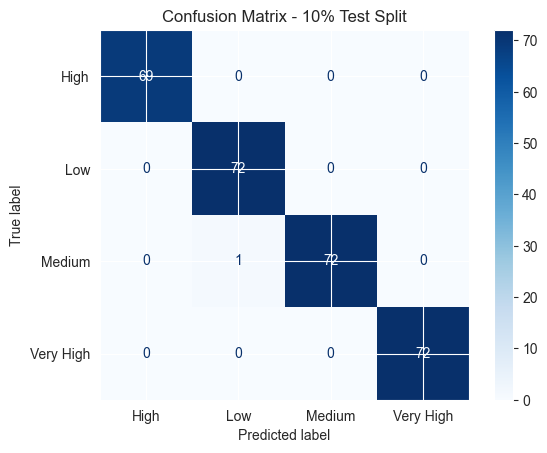

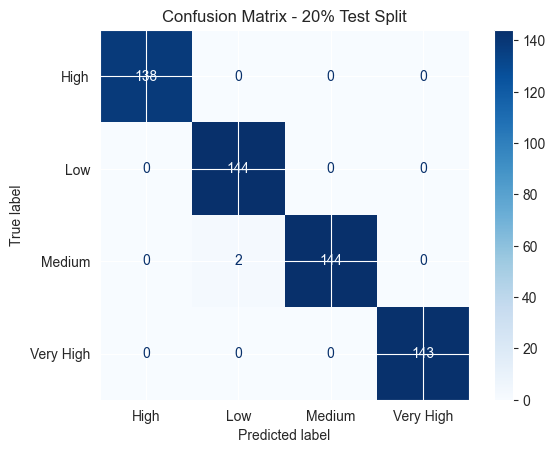

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        69
         Low       0.99      1.00      0.99        72
      Medium       1.00      0.99      0.99        73
   Very High       1.00      1.00      1.00        72

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       138
         Low       0.99      1.00      0.99       144
      Medium       1.00      0.99      0.99       146
   Very High       1.00      1.00      1.00       143

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571


In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm_10 = confusion_matrix(y_test_10, y_pred_10)
cm_20 = confusion_matrix(y_test_20, y_pred_20)

disp_10 = ConfusionMatrixDisplay(confusion_matrix=cm_10, display_labels=le_target.classes_)
disp_20 = ConfusionMatrixDisplay(confusion_matrix=cm_20, display_labels=le_target.classes_)

disp_10.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - 10% Test Split')
plt.show()

disp_20.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - 20% Test Split')
plt.show()

print(classification_report(y_test_10, y_pred_10, target_names=le_target.classes_))
print(classification_report(y_test_20, y_pred_20, target_names=le_target.classes_))
